In [1]:
import numpy as np
import torch, torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Neural Networks using PyTorch framework
---
![](resources/torch.png)
## Comparing performance of classical networks to convolutional neural networks 

## Typical Deep Learning workflow:

1. Load your training datasets, and(if needed) convert them into PyTorch datasets
2. Build PyTorch-DataLoaders using your datasets, set shuffle = True and define batch size
3. Define the neural network structure
4. Training process:
    - Define optimizer
    - Define loss function
    - Define # of training iterations
    - Train your model
5. Evaluation process:
    - Use your model to predict labels for your test set
    - evaluate accuracy with true labels

# Part I: Pair programming

## Get the training data

In [2]:
# Get the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

training_data = torchvision.datasets.MNIST('data/', train=True, download=True, transform=transform)
testing_data = torchvision.datasets.MNIST('data/', train=False, download=True, transform=transform)

In [38]:
training_data.targets[0]

tensor(5)

In [50]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [52]:
training_data.data.shape

torch.Size([60000, 28, 28])

In [4]:
testing_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

## Look at the data more closely

In [1]:
# Look at a particular point

test_img = training_data.data[0]
test_label = training_data.targets[0]
# 1. plot it
# 2. show it's format


NameError: name 'training_data' is not defined

In [7]:
#np.unique(train_loader.dataset)

## Create dataloaders to feed data into our neural network

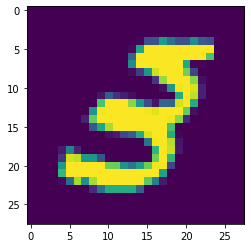

In [45]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(testing_data, batch_size=16, shuffle=True)
#转换成torch可以处理的类型
plt.imshow(list(train_loader)[0][0][0][0])

In [46]:
len(train_loader)

3750

In [48]:
3750 * 16

60000

# Define the network

In [27]:
class Conv_Net(torch.nn.Module):
    
    def __init__(self, input_dim, num_classes):
        
        super(Conv_Net, self).__init__()
        
        self.input_dim = input_dim
        self.num_classes = num_classes
        
        self.Conv1 = torch.nn.Conv2d(1,6,5)
        self.Conv2 = torch.nn.Conv2d(6,16,5)
        
        self.pool = torch.nn.MaxPool2d(2)
        
        self.layer1 = torch.nn.Linear(16 * 4 * 4, 50)
        # 50 is the num of hidden neuro
        self.layer2 = torch.nn.Linear(50, 100)
        self.layer3 = torch.nn.Linear(100, self.num_classes)
        
    def forward(self, x):
        
        # Input shape: 28 x 28 x 6
        x = self.Conv1(x)
        x = F.relu(x)
        
        # Input 24 x 24 x 6
        x = self.pool(x)
        
        # 12 x 12 x 6
        x = self.Conv2(x)
        x = F.relu(x)
        
        # 8 x 8 x 16
        x = self.pool(x)
        
        # 4 x 4 x 16
        # pssing the first layer
        # x = self.layer1(x)
        x = self.layer1(x.view(-1,16 * 4 * 4))
        x = F.sigmoid(x)
        x = F.relu(x)
        
        # pssing the second layer
        x = self.layer2(x)
        x = F.sigmoid(x)
        x = F.relu(x)
        
        # pssing the third layer
        x = self.layer3(x)
        
        return x

## Training loop

In [28]:
# 1. Create an object of the neural network
# 2. Define an optimizer
# 3. Define a loss function

network = Conv_Net(784, 10)
optimizer = torch.optim.SGD(params = network.parameters(), lr = 0.001)
loss_fn = torch.nn.CrossEntropyLoss()



In [30]:
# Run the training loop

num_iterations = 10

for epoch in range(num_iterations):
    
    running_loss = 0.0
    
    for i, data in enumerate(train_loader):
        
        x,y = data
        
        # Zero-out gradient
        optimizer.zero_grad()
        
        #forward pass
        prediction = network.forward(x)
        
        #compute loss
        loss = loss_fn(prediction, y)
        running_loss += loss.item()
        
        #back propagation
        loss.backward()
        
        optimizer.step()
        
    print(f'Error after epoch: {epoch} = {running_loss / len(train_loader)}')

Error after epoch: 0 = 2.2960093760172526
Error after epoch: 1 = 2.294060476620992
Error after epoch: 2 = 2.2911027784347535
Error after epoch: 3 = 2.2865263544718424
Error after epoch: 4 = 2.27801403242747
Error after epoch: 5 = 2.2610354305267335
Error after epoch: 6 = 2.220646917025248
Error after epoch: 7 = 2.1215331181526182
Error after epoch: 8 = 1.9438045182863872
Error after epoch: 9 = 1.7162078857421874


# Evaluation loop

In [39]:
# evaluation loop

correct = 0
total = 0
with torch.no_grad():
    
    for i, data in enumerate(test_loader):
        
        x,y = data
        
        predicted = network.forward(x)
        
        _, predicted = torch.max(predicted.data, 1)
        
        correct += (predicted == y).sum().item()
        
        total += y.size(0)
        
print(f'Final acccuracy: {correct / total * 100}% ')

D:\software\anaconda\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Final acccuracy: 64.53% 


## Compare regular Multilayer-perceptron performance against Convolutional neural network

### How to compute output size after convolutional layer ??:
- If stride = 1, padding = 0, dilation = 1 
- output shape 0: (size(input.shape[0]) - kernel.shape[0]) + 1
- same for output shape 1

- Nice visualizations of different kernel/filter/convolution strategies: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

### How to compute output size after fully connected layer ??:
- If stride = 1, padding = 0, dilation = 1 
- output shape 0: (size(input.shape[0]) - kernel.shape[0]) + 1
- same for output shape 1

- Nice visualizations of different kernel/filter/convolution strategies: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

In [ ]:
# Define a convolutional neural network

In [ ]:
# 1. Create an object of the neural network
# 2. Define optimizer
# 3. Define a loss function

neural_net = ConvNet()
optimizer = torch.optim.SGD(params=neural_net.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# training loop:

# Evaluation loop

In [ ]:
# Evaluation loop
correct = 0
total = 0
with torch.no_grad():


# Part II: Build your own Neural Network classifiers:

### Todos:
1. Load the CIFAR 10 train and test dataset from the torchvision library that we have used above for the MNIST data:
Documentation: https://pytorch.org/docs/stable/torchvision/datasets.html

2. Create DataLoaders for the training and test size:
    - experiment with different batch sizes
3. Create one fully connected model and another Convolutional Neural Network, for each experiment with different layer sizes(# of neurons) and layer types:
    - Conv layers preprocess the data
    - Pooling layers preprocess the data
    - Fully connected layer need to be added at the end to classify the data

4. Evaluate the prediction accuracy(all correct classified points / number of points) of your Fully-connected and Convolutional Neural Networks

5. Evaluate prediction accuracy of each class, e.g.: Correctly classified: 60% of planes, 70% of cars, 30% of housed etc.